In [46]:

import awkward as ak
from pathlib import Path
import time
import matplotlib.pyplot as plt
import uproot
import infofile, newinfofile
lumi = 10 #for Data A/B/C/D

In [47]:
data_dir = Path("/project/etp1/dkoch/ATLASOpenData-test")
samples_new = {
    "ttbar": {
        "list": [
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000001.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000002.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000003.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000004.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000005.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000008.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000009.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000010.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000011.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000012.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000013.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000014.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000016.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000017.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000018.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000019.output_ntup.root",
            data_dir / "ttbar-samples-with-weights/user.garciarm.39227472._000020.output_ntup.root",
        ]
    }
}
treename_new = "analysis"
branches_new = [
    "lep_pt","lep_eta","lep_phi",
    "lep_e","lep_charge","lep_type", "lep_n",
    "mcWeight",'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_e',
    
 'mcWeight',
      "ScaleFactor_PILEUP",
     "ScaleFactor_ELE",
     "ScaleFactor_MUON",
 
    
   
]
#Previous Fields:

# treename_new = "analysis"
# branches_new = [
#     "lep_pt","lep_eta","lep_phi",
#     "lep_e","lep_charge","lep_type", "lep_n",
#     "mcWeight",
#     # "scaleFactor_PILEUP",
#     # "scaleFactor_ELE",
#     # "scaleFactor_MUON",
# ]

samples_old = {
    "ttbar": {
        "list": [
            # "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_410000.ttbar_lep.2lep.root",
            '/home/i/I.Kuscu/bachelorarbeit/file_test/mc_410000.ttbar_lep.2lep.root'
        ]
    }
}
treename_old = "mini"
branches_old = [
    "lep_pt","lep_eta","lep_phi",
    "lep_E","lep_charge","lep_type", "lep_n",
    "mcWeight", "scaleFactor_PILEUP",
    "scaleFactor_ELE","scaleFactor_MUON",
    "scaleFactor_LepTRIGGER",'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_E',
 'mcWeight',
 'scaleFactor_PILEUP',
 'scaleFactor_ELE',
 'scaleFactor_MUON',

#Previous Fields:

    
# treename_old = "mini"
# branches_old = [
#     "lep_pt","lep_eta","lep_phi",
#     "lep_E","lep_charge","lep_type", "lep_n",
#     "mcWeight", "scaleFactor_PILEUP",
#     "scaleFactor_ELE","scaleFactor_MUON",
#     "scaleFactor_LepTRIGGER",
    
]

In [49]:
def calc_weight(xsec_weight, events):
    return (
        #xsec_weight ohne xsec
         events.mcWeight
        * events.scaleFactor_PILEUP
        * events.scaleFactor_ELE
        * events.scaleFactor_MUON 
        * events.scaleFactor_LepTRIGGER
    )

In [50]:
def get_new_data(samples, treename, branches):
    data = {}
    for s in samples:
        print(f"processing {s} samples")
        chunks = []
        for chunk in uproot.iterate({file: treename for file in samples[s]["list"]}, expressions=branches):
            n_in = len(chunk)
            chunk = chunk[chunk.lep_n>=2]
            n_out = len(chunk)
            print(f"  processed {n_in} events, kept {n_out}")
            chunks.append(chunk)
        data[s] = ak.concatenate(chunks)
    return data

In [51]:
start = time.time()
data_new = get_new_data(samples_new, treename_new, branches_new)
end = time.time()
print(f"took {end - start}s")

processing ttbar samples
  processed 1074846 events, kept 541480
  processed 1074846 events, kept 540355
  processed 832809 events, kept 419349
  processed 1074963 events, kept 540243
  processed 1074963 events, kept 540783
  processed 791160 events, kept 398502
  processed 1074560 events, kept 541555
  processed 1074560 events, kept 540221
  processed 791379 events, kept 397725
  processed 1074677 events, kept 541781
  processed 1074677 events, kept 540924
  processed 813024 events, kept 409656
  processed 1074596 events, kept 540778
  processed 157848 events, kept 79528
  processed 1074590 events, kept 541201
  processed 1074590 events, kept 541051
  processed 739678 events, kept 372189
  processed 1073597 events, kept 541031
  processed 1073597 events, kept 540219
  processed 795367 events, kept 400166
  processed 1074141 events, kept 540256
  processed 1040903 events, kept 523598
  processed 1073938 events, kept 540866
  processed 1073938 events, kept 540739
  processed 424156 even

In [52]:
start = time.time()
data_old = get_new_data(samples_old, treename_old, branches_old)
end = time.time()
print(f"took {end - start}s")

processing ttbar samples
  processed 863615 events, kept 863615
  processed 863615 events, kept 863615
  processed 863615 events, kept 863615
  processed 319694 events, kept 319694
took 9.215880155563354s


In [108]:
data_new[sample].mcWeight*data_new[sample].ScaleFactor_PILEUP *data_new[sample].ScaleFactor_ELE *data_new[sample].ScaleFactor_MUON

<Array [782, 645, -766, 739, ..., 843, 792, 766, 781] type='19742831 * float32'>

In [107]:
data_old[sample].mcWeight*data_old[sample].scaleFactor_PILEUP*data_old[sample].scaleFactor_ELE*data_old[sample].scaleFactor_MUON

<Array [0.532, 0.576, 0.579, ..., 0.544, 0, 0.184] type='2910539 * float32'>

In [141]:
data_old[sample].scaleFactor_PILEUP
data_old[sample].scaleFactor_ELE
data_old[sample].scaleFactor_MUON
data_old[sample].mcWeight

<Array [1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1] type='2910539 * float32'>

In [142]:
data_new[sample].ScaleFactor_PILEUP
data_new[sample].ScaleFactor_ELE
data_new[sample].ScaleFactor_MUON
data_new[sample].mcWeight

<Array [736, 736, 736, 736, ..., 735, 735, 735, 735] type='19742831 * float32'>

In [95]:
data_old[sample].mcWeight

<Array [1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1] type='2910539 * float32'>

In [132]:
data_new[sample].lep_e*data_new[sample].mcWeight*data_new[sample].ScaleFactor_PILEUP*data_new[sample].ScaleFactor_ELE*data_new[sample].ScaleFactor_MUON

<Array [[1.02e+05, 4.58e+04], ..., [...]] type='19742831 * var * float32'>

In [133]:
data_old[sample].lep_E*data_old[sample].mcWeight*data_old[sample].scaleFactor_PILEUP*data_old[sample].scaleFactor_ELE*data_old[sample].scaleFactor_MUON

<Array [[4.24e+04, 1.94e+04], [...], ..., [...]] type='2910539 * var * float32'>

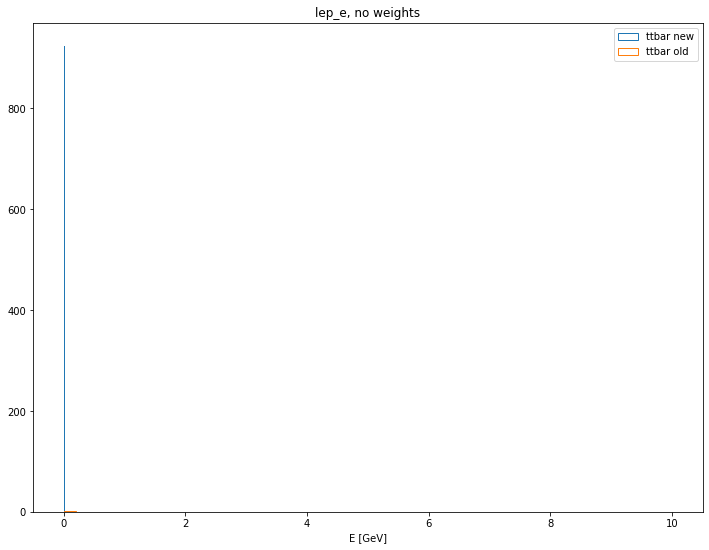

In [143]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_e*
                        data_new[sample].mcWeight*
                        data_new[sample].ScaleFactor_PILEUP*
                        data_new[sample].ScaleFactor_ELE*
                        data_new[sample].ScaleFactor_MUON), range=(0, 0.05), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten((data_old[sample].lep_E/1000)*
                        data_old[sample].mcWeight*
                        data_old[sample].scaleFactor_PILEUP*
                        data_old[sample].scaleFactor_ELE*
                        data_old[sample].scaleFactor_MUON), range=( 0,10), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_e, no weights")
plt.xlabel("E [GeV]")
plt.show()

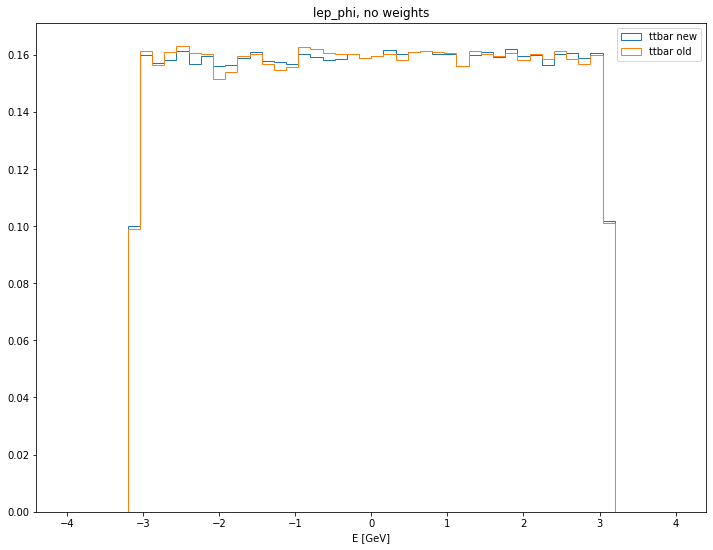

In [120]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_phi), range=(-4, 4), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_phi), range=(-4, 4), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_phi, no weights")
plt.xlabel("E [GeV]")
plt.show()

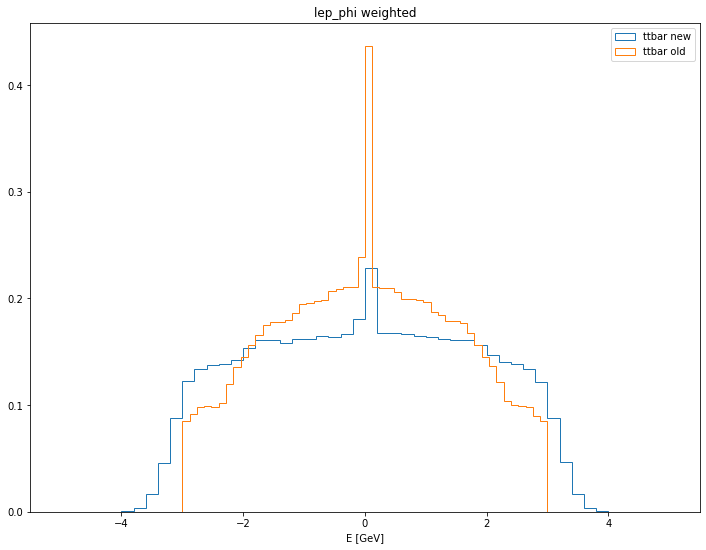

In [149]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_phi*
                       
                        data_new[sample].ScaleFactor_PILEUP*
                        data_new[sample].ScaleFactor_ELE*
                        
                        data_new[sample].ScaleFactor_MUON), range=(-5, 5), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_phi
                       *data_old[sample].mcWeight*
                        data_old[sample].scaleFactor_PILEUP*
                        data_old[sample].scaleFactor_ELE*
                    
                        data_old[sample].scaleFactor_MUON )  #
             , range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_phi weighted")
plt.xlabel("E [GeV]")
plt.show()

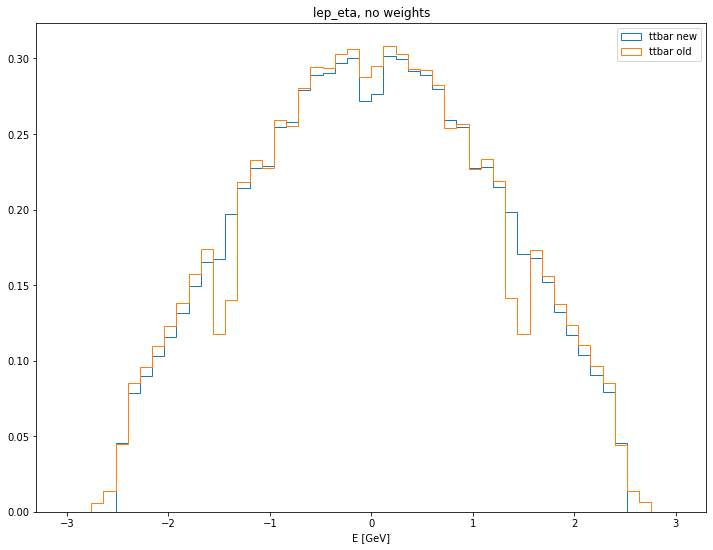

In [129]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_eta), range=(-3, 3), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_eta), range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_eta, no weights")
plt.xlabel("E [GeV]")
plt.show()

In [156]:
data_new

{'ttbar': <Array [{lep_pt: [...], ...}, ..., {...}] type='19742831 * {lep_pt: var * f...'>}

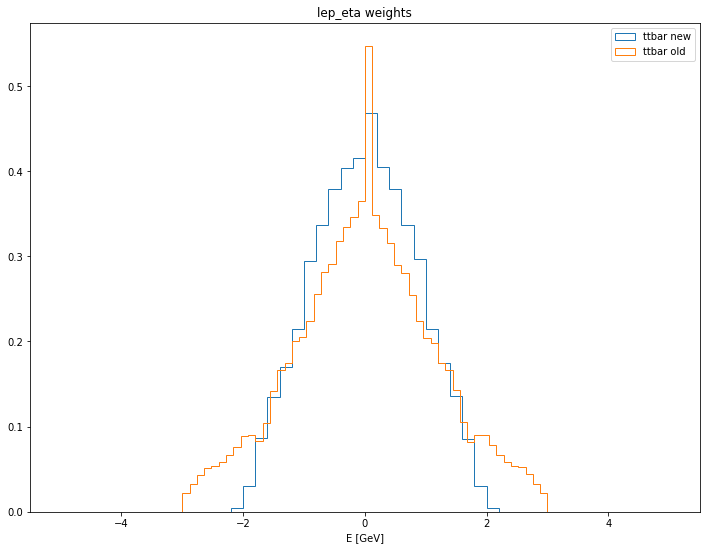

In [157]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].lep_eta
                       *data_new[sample].mcWeight*
                        data_new[sample].ScaleFactor_PILEUP*
                        data_new[sample].ScaleFactor_ELE*
                        
                        data_new[sample].ScaleFactor_MUON)/1000, range=(-5, 5), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].lep_eta
                       *data_old[sample].mcWeight*
                        data_old[sample].scaleFactor_PILEUP*
                        data_old[sample].scaleFactor_ELE*
                    
                        data_old[sample].scaleFactor_MUON )  #
             , range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("lep_eta weights")
plt.xlabel("E [GeV]")
plt.show()

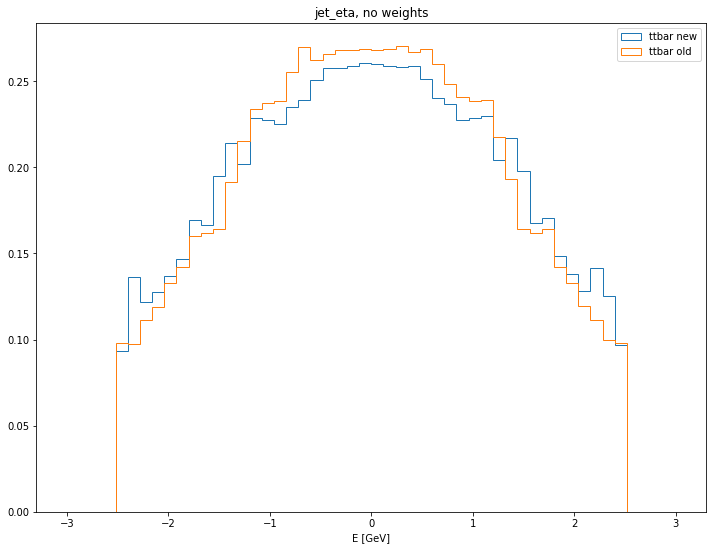

In [123]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_eta), range=(-3, 3), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_eta), range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_eta, no weights")
plt.xlabel("E [GeV]")
plt.show()

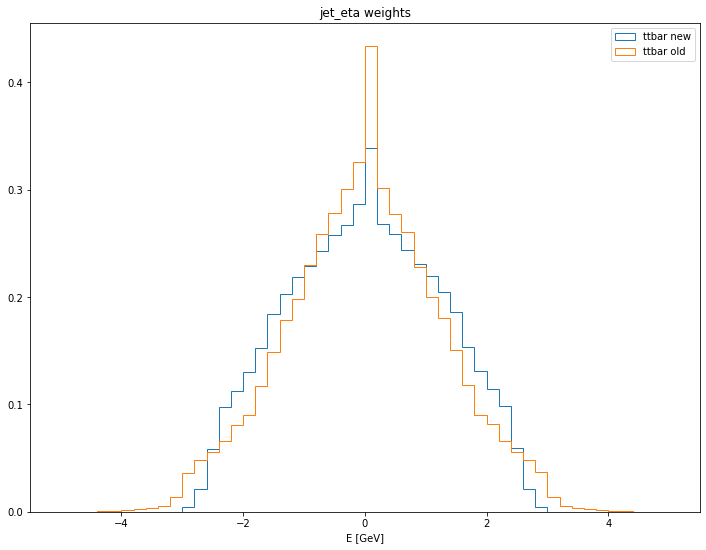

In [151]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_eta*
                        data_new[sample].ScaleFactor_PILEUP*
                        data_new[sample].ScaleFactor_ELE*
                        
                        data_new[sample].ScaleFactor_MUON), range=(-5, 5), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_eta
                       *data_old[sample].mcWeight*
                        data_old[sample].scaleFactor_PILEUP*
                        data_old[sample].scaleFactor_ELE*
                    
                        data_old[sample].scaleFactor_MUON )  #
             , range=(-5, 5), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_eta weights")
plt.xlabel("E [GeV]")
plt.show()

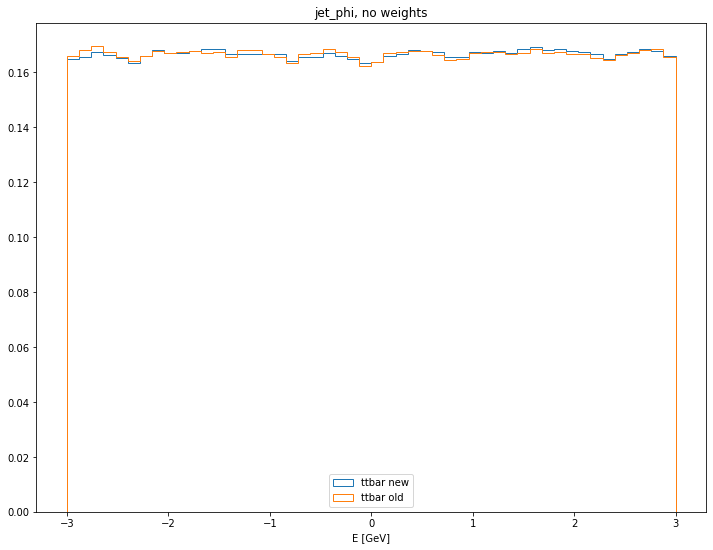

In [153]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_phi), range=(-3, 3), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_phi), range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_phi, no weights")
plt.xlabel("E [GeV]")
plt.show()

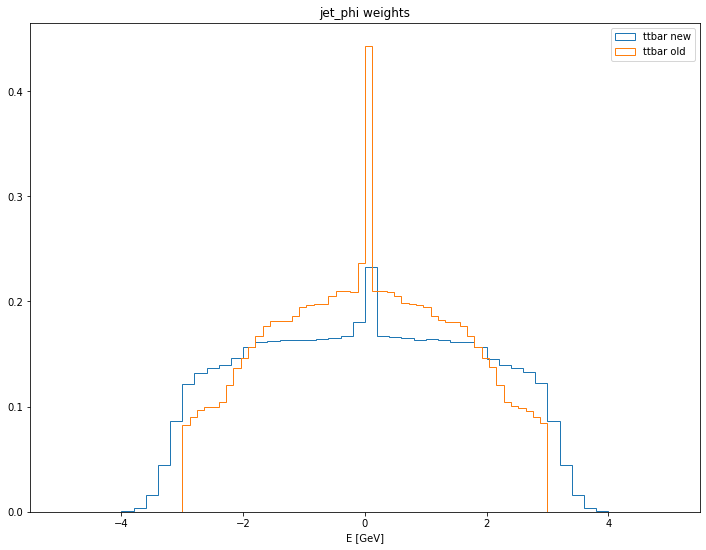

In [182]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_phi*
                
                        data_new[sample].ScaleFactor_PILEUP*
                        data_new[sample].ScaleFactor_ELE*
                        
                        data_new[sample].ScaleFactor_MUON), range=(-5, 5), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_phi
                       *data_old[sample].mcWeight*
                        data_old[sample].scaleFactor_PILEUP*
                        data_old[sample].scaleFactor_ELE*
                    
                        data_old[sample].scaleFactor_MUON )  #
             , range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_phi weights")
plt.xlabel("E [GeV]")
plt.show()

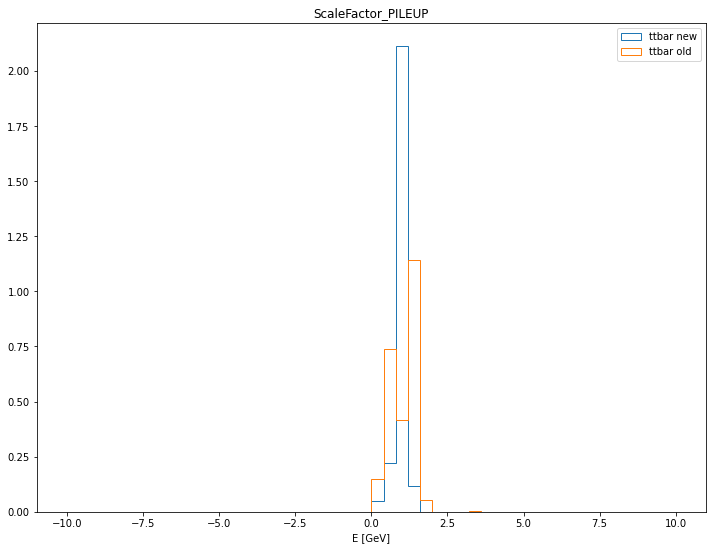

In [172]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist((data_new[sample].ScaleFactor_PILEUP), range=(-1, 10), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist((data_old[sample].scaleFactor_PILEUP), range=(-10, 10), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("ScaleFactor_PILEUP")
plt.xlabel("E [GeV]")
plt.show()

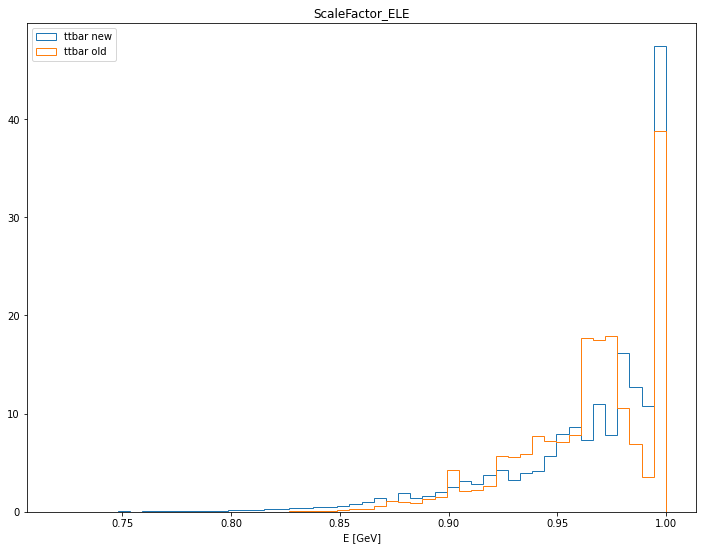

In [180]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist((data_new[sample].ScaleFactor_ELE), range=(0.72, 1), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist((data_old[sample].scaleFactor_ELE), range=(0.72, 1), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("ScaleFactor_ELE")
plt.xlabel("E [GeV]")
plt.show()

In [178]:
(data_new[sample].ScaleFactor_ELE)

<Array [0.988, 0.87, 1, 0.967, ..., 0.969, 0.984, 1] type='19742831 * float32'>

In [ ]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_pt), range=(0, 800), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_pt)/ 1000, range=(0, 800) , bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_pt, no weights")
plt.xlabel("E [GeV]")
plt.show()


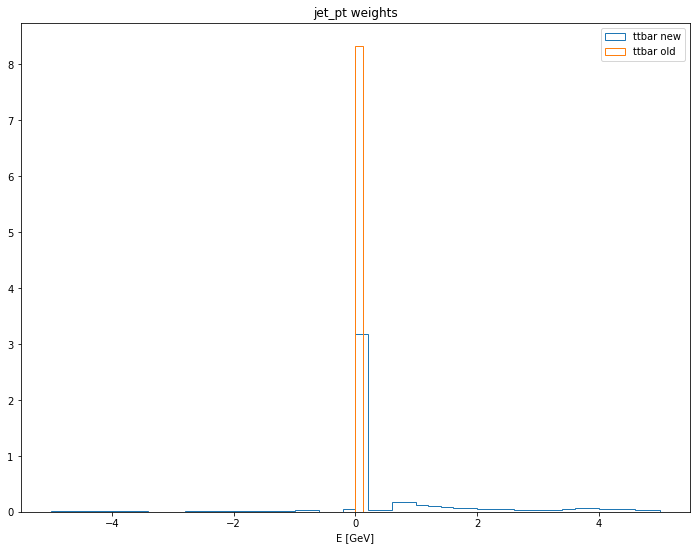

In [127]:
plt.figure(figsize=(12, 9))
for sample in samples_new:
    plt.hist(ak.flatten(data_new[sample].jet_pt
                       *data_new[sample].mcWeight*
                        data_new[sample].ScaleFactor_PILEUP*
                        data_new[sample].ScaleFactor_ELE*
                        
                        data_new[sample].ScaleFactor_MUON)/1000, range=(-5, 5), bins=50, label=f"{sample} new", density=True, histtype="step")
    plt.hist(ak.flatten(data_old[sample].jet_pt
                       *data_old[sample].mcWeight*
                        data_old[sample].scaleFactor_PILEUP*
                        data_old[sample].scaleFactor_ELE*
                    
                        data_old[sample].scaleFactor_MUON )  #
             , range=(-3, 3), bins=50, label=f"{sample} old", density=True, histtype="step")
plt.legend()
plt.title("jet_pt weights")
plt.xlabel("E [GeV]")
plt.show()

In [162]:
mc_weights.append(ak.to_numpy(data[s].totalWeight) ) # append to the list of Monte Carlo weights

NameError: name 'mc_weights' is not defined